##  Описание данных

Выгрузим данные о гипотезах, информацию о заказах и количестве пользователей из csv-файлов в датафрейм и сохраним в переменные `hypothesis`, `orders` и `visitors` соответственно.

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# загружаем данные
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except FileNotFoundError:
    display('Такого файла не существует!')

Изучим данные датафрейма `hypothesis`.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Таблица `hypothesis` содержит следующую информацию:
- `Hypothesis` - краткое описание гипотезы;
- `Reach` - охват пользователей по 10-балльной шкале;
- `Impact` - влияние на пользователей по 10-балльной шкале;
- `Confidence` - уверенность в гипотезе по 10-балльной шкале;
- `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Приведем названия столбцов к нижнему регистру.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

Выведем основную информацию о датафрейме с помощью метода info().

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица с исходными данными содержит 5 столбцов и 9 строк. Пропусков в данных нет.

Изучим данные датафрейма `orders`.

In [6]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
1107,1024573057,1028756448,2019-08-12,290,A
832,2470658885,3766097110,2019-08-30,360,B
367,1033377712,3860669668,2019-08-19,3990,B
100,804934578,1738775963,2019-08-01,3240,B
38,3276214732,1110007955,2019-08-15,19260,B
97,2012801741,414545763,2019-08-01,5555,B
2,2961555356,4069496402,2019-08-15,400,A
962,3024416906,530257481,2019-08-10,19260,B
1047,1266191879,4259830713,2019-08-11,3190,A
154,4206138190,1219079053,2019-08-01,4970,A


Таблица `orders` содержит следующую информацию:
- `transactionId` - идентификатор заказа;
- `visitorId` - идентификатор пользователя, совершившего заказ;
- `date` - дата, когда был совершён заказ;
- `revenue` - выручка заказа;
- `group` - группа A/B-теста, в которую попал заказ.

Изменим названия столбцов `transactionId` и `visitorId` на более понятные для нас названия - `orderId` и `userId` соответственно.

In [7]:
orders = orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId'})

Выведем основную информацию о датафрейме с помощью метода info().

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Таблица с исходными данными содержит 5 столбцов и 1197 строк. Пропусков в данных нет. Обратим внимание, что столбец `date` имеет тип `object`, изменим его на `datetime`.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# check
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Узнаем сколько групп участвуют в нашем тесте.

In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В нашем тесте участвуют две группы 'A' и 'B'.       

Выясним даты начала и окончания теста.

In [12]:
orders['date'].min(), orders['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Наш тест проводили ровно месяц - с 1 по 31 августа 2019 года.

Узнаем сколько пользователей участвовало в каждой группе.

In [13]:
group_A = orders[orders['group']=='A']
len(group_A)

557

In [14]:
group_B = orders[orders['group']=='B']
len(group_B)

640

В группе 'B' участвовало - 640 пользователей, а в группе 'A' на 83 пользователя меньше - 557 пользователей.

Проверим данные на наличие дубликатов.         

In [15]:
orders.duplicated().sum()

0

В таблице с заказами нет строк-дубликатов.

Проверим, есть ли в данных пропуски методом isna().

In [16]:
orders.isna().sum()

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

В таблице с заказами нет строк с пропусками.

Изучим данные датафрейма `visitors`.

In [17]:
visitors.sample(10)

,date,group,visitors
42,2019-08-12,B,543
44,2019-08-14,B,746
22,2019-08-23,A,468
24,2019-08-25,A,621
41,2019-08-11,B,721
11,2019-08-12,A,595
34,2019-08-04,B,770
52,2019-08-22,B,650
27,2019-08-28,A,594
25,2019-08-26,A,722


Таблица `visitors` содержит следующую информацию:
- `date` - дата;
- `group` - группа A/B-теста;
- `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста.

Выведем основную информацию о датафрейме с помощью метода info().

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица с исходными данными содержит 3 столбца и 62 строки. Пропусков в данных нет. Обратим внимание, что столбец `date` имеет тип `object`, изменим его на `datetime`.

In [19]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
# check
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Узнаем сколько групп в таблице с пользователями.

In [21]:
visitors.group.unique()

array(['A', 'B'], dtype=object)

Две группы - 'A' и 'B'.

Узнаем дату начала и окончания.

In [22]:
visitors.date.min(), visitors.date.max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Даты проведения теста совпадают с таблицей заказов - тест проводили с 1 по 31 августа 2019 года.

Проверим данные на количество дубликатов.

In [23]:
visitors.duplicated().sum()

0

В таблице с пользователями нет строк-дубликатов.

Проверим есть ли пропуски методом isna().

In [24]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков в данных нет.

In [25]:
group_A

,orderId,userId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Проверим есть ли пользователи, которые попали в группу 'A' и группу 'B'.

In [26]:
# создадим пустой список, в который добавим id пользователей, которые есть и в группе 'A' и в группе 'B'
duplicates = []

for user_a_id in group_A['userId']:      
    for user_b_id in group_B['userId']:
        is_duplicate = user_a_id == user_b_id
        if is_duplicate:
            duplicates.append(user_b_id)
    
print(len(duplicates))

183


В тесте есть большое количество пользователей, которые попали в группу 'A' и группу 'B', их количество равно 183.

##  Приоритизация гипотез

Применим фреймворк `ICE` для приоритизации гипотез датафрейма `hypothesis`. Для этого нам понадобятся следующие параметры:

- `impact` - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- `confidence` - насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- `efforts` - сколько стоит протестировать эту гипотезу.  

In [27]:
# посчитаем ICE для гипотез
hypothesis_ICE = hypothesis.copy()

hypothesis_ICE['ICE'] = hypothesis_ICE['impact']*hypothesis_ICE['confidence']/hypothesis_ICE['efforts']

# выведем столбцы "hypothesis" и "ICE"
# отсортирeуем таблицу по убыванию приоритета
hypothesis_ICE = (hypothesis_ICE[['hypothesis', 'ICE']]
                  .sort_values(by='ICE', ascending=False))
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гипотезы по `ICE` - гипотезы с индексом 8, 0, 7, 6 и 2. Рассмотрим подробнее, что хранят в себе эти гипотезы.

In [28]:
hypothesis_ICE.hypothesis.unique()

array(['Запустить акцию, дающую скидку на товар в день рождения',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'],
      dtype=object)

- `Гипотеза_8` - запустить акцию, дающую скидку на товар в день рождения;
- `Гипотеза_0` - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- `Гипотеза_7` - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- `Гипотеза_6` - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- `Гипотеза_2` - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

**Применение фреймворка RICE для приоритизации гипотез.**

Применим фреймворк `RICE` для приоритизации гипотез датафрейма `hypothesis`. Для этого нам понадобятся следующие параметры:

- `reach` - скольких пользователей затронет изменение, которое вы хотите внести;
- `impact` - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- `confidence` - насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- `efforts` - сколько стоит протестировать эту гипотезу.  

In [29]:
# посчитаем RICE для гипотез
hypothesis_RICE = hypothesis.copy()

hypothesis_RICE['RICE'] = hypothesis_RICE['reach']*hypothesis_RICE['impact']*hypothesis_RICE['confidence']\
/hypothesis_RICE['efforts']

# выведем столбцы "hypothesis" и "RICE"
# отсортирeуем таблицу по убыванию приоритета
hypothesis_RICE = (hypothesis_RICE[['hypothesis', 'RICE']]
                  .sort_values(by='RICE', ascending=False))
hypothesis_RICE

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее перспективные гипотезы по `RICE` - уже знакомые нам гипотезы с индексом 7, 2, 0, 6 и 8.

При применении метода `RICE` вместо `ICE`, наиболее перспективными гипотезами по прежнему остались гипотезы с индексом 8, 0, 7, 6 и 2. Но порядок их изменился: `Гипотеза_7` по методу `RICE` оказалась самой перспективной, по методу `ICE` эта гипотеза занимала третью строчку. `Гипотеза_2` занимет вторую строчку, в то время как по методу `ICE` она занимала пятую строчку. `Гипотеза_0` и `Гипотеза_6` по методу `RICE` занимают третью строчку, по методу `ICE` эти гипотезы занимали вторую и четвертую строки соответственно. `Гипотеза_8` по методу `RICE` занимет последнее место среди наиболее перспективных гипотез, в то время как по методу `ICE` это была самая перспективная гипотеза.

Фреймворк `RICE` и `ICE` очень похожи, разница лишь в том, что при расчете `RICE` добавляется ещё один компонент -`reach`, который и повлиял на порядок приоритизации гипотез. Можно также сказать, что `RICE` - это `reach` умноженный на `ICE`. Посмотрим на параметр `reach` в исходной таблице `hypothesis`, и его влияние на `RICE`.

In [30]:
display(hypothesis, hypothesis_RICE)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Самый высокий параметр `reach` у `Гипотеза_7` - он равен 10, в то время как у остальных гипотез он меньше. Это означает, что изменение, которое мы хотим внести охватывает самое большое количество пользователей интернет-магазина. 

## Анализ A/B-теста

### График кумулятивной выручки по группам

Для того, чтобы построить график кумулятивной выручки по группам, необходимо сначала собрать все необходимые куммулятивные данные.

Создадим датафрейм `datesGroups` с уникальными парами значений `date` и `group`, таблицы orders.

In [31]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(10)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
85,2019-08-22,B
86,2019-08-22,A
124,2019-08-17,A
125,2019-08-17,B


Объявим переменную `ordersAggregated`, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

Для этого соберём агрегированные кумулятивные данные о заказах по дням в несколько действий. Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`. Далее агрегируем значения: вычислим максимальную дату, найдём число уникальных ID заказов и пользователей, подсчитаем сумму средних чеков. Применим методы к каждой строке датафрейма и отсортируем результаты по столбцам `date` и `group`.

In [32]:
ordersAggregated = (datesGroups
                    .apply
                    (
                        lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                        orders['group'] == x['group'])]
                        .agg({
                            'date' : 'max', 
                            'group' : 'max', 
                            'orderId' : 'nunique', 
                            'userId' : 'nunique', 
                            'revenue' : 'sum'
                            }), 
                        axis=1
                    )
                    .sort_values(by=['date','group'])
                   )

ordersAggregated.head(10)

,date,group,orderId,userId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


Аналогично получим агрегированные кумулятивные данные по дням о посетителях интернет-магазина и сохраним их в переменной `visitorsAggregated`: 

In [33]:
visitorsAggregated = (datesGroups
                    .apply
                    (
                        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                          visitors['group'] == x['group'])]
                        .agg({
                            'date' : 'max', 
                            'group' : 'max', 
                            'visitors' : 'sum'
                            }), 
                        axis=1
                    )
                    .sort_values(by=['date','group'])
                   )

visitorsAggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


Объединим обе таблицы с агрегированными кумулятивными данными в одну, и сохраним ее в переменной `cumulativeData`. 

In [34]:
cumulativeData = (ordersAggregated
                  .merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']))
cumulativeData.head(10)

,date,group,orderId,userId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Переименуем названия столбцов таблицы `cumulativeData`, где:
- `date` - дата;
- `group` - группа A/B-теста (A или B);
- `orders` - кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` - кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` - кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` - кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [35]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

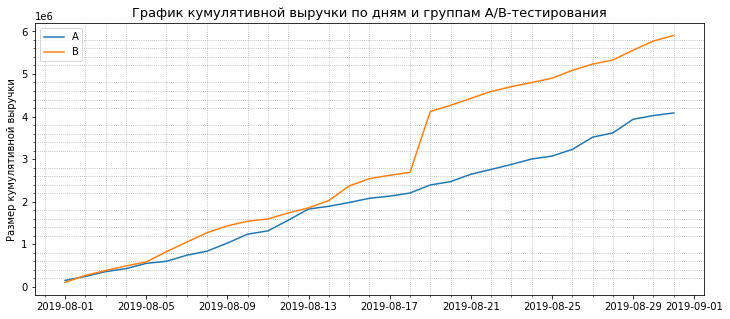

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# устанавливаем размер фируры
plt.figure(figsize=(12, 5))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel('Размер кумулятивной выручки', fontsize = 10)
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования', fontsize = 13)

plt.legend(); 

В первые несколько дней теста размер кумулятивной выручки группы `А` и `В` практически не отличался. Затем, мы наблюдаем постепенный, более активный рост кумулятивный выручки группы `В`. В середине теста группа `В` вырывается вперёд и продолжает лидировать до конца теста. Такой резкий рост кумулятивной выручки группы `В` может быть связан с появлением очень дорогих заказов в выборке, или увеличении количества заказов.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам - разделим кумулятивную выручку `revenue` на кумулятивное число заказов `orders`.

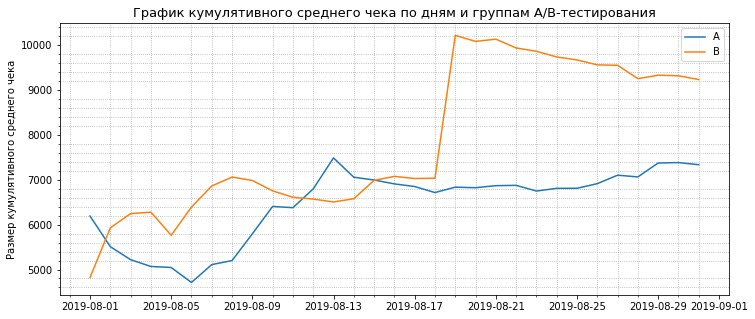

In [37]:
# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# строим график кумулятивного среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel('Размер кумулятивного среднего чека', fontsize = 10)
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize = 13)

plt.legend(); 

В начале теста средний чек группы `А` падает, затем начинает постепенно рости и к середине теста он устанавливается примерно на одном уровне и остается таким до конца теста. Средний чек группы `В` в начале теста постепенно растёт, затем в середине теста мы наблюдаем резкий скачок среднего чека, и его постепенное падение до конца теста. Вероятнее всего, в группе `В` появилось большое число крупных заказов или их количество сильно возросло.  

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Для этого объединим таблицы `cumulativeRevenueA` и `cumulativeRevenueB` так, чтобы она содержала столбцы: `date`, `revenueA`, `revenueB`, `ordersA`, `ordersB`. Сохраним датафрейм в переменной `mergedCumulativeRevenue`.

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


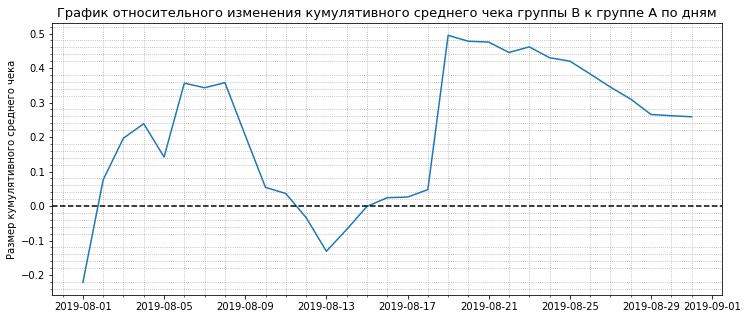

In [39]:
# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel('Размер кумулятивного среднего чека', fontsize = 10)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A по дням', fontsize = 13);

plt.show()

В начале на графике мы наблюдаем рост среднего чека группы `В` относительно группы `А`, затем мы видим его постепенное падение до определенного уровня, и снова плавный рост. Но в определенный момент времени, мы наблюдаем резкий скачок среднего чека группы `В` относительно группы `А`, который затем плавно падает и устанавливается на одном уровне на пару дней в самом конце теста. Как мы и предполагали ранее, вероятнее всего в группе `В` появилось большое число крупных заказов или количество заказов возросло.

### График кумулятивного среднего количества заказов на посетителя по группам

Построим и проанализируем график кумулятивного среднего количества заказов на посетителя или кумулятивной конверсии по группам. Для этого посчитаем кумулятивную конверсию, как отношение числа заказов к количеству пользователей в указанной группе в указанный день.

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

display(cumulativeDataA.head(), cumulativeDataB.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


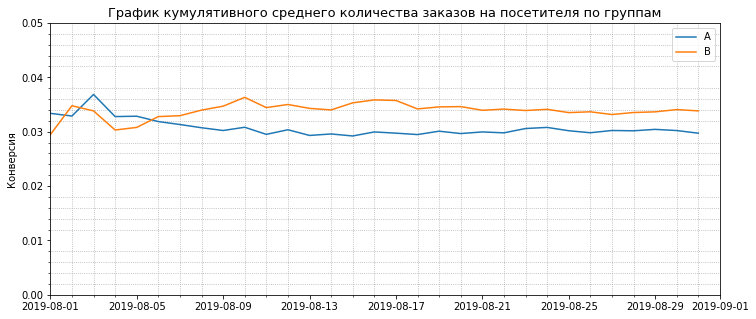

In [41]:
# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel('Конверсия', fontsize = 10)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize = 13);

В начале теста группа `А` имела большую конверсию, но постепенно конверсия группы `В` стала рости и зафиксировалась примерно около одного значения, больше значения конверсии группы `А`. На графике видно, что как конверсия группы `В`, так и конверсия группы `А` установилась около своего среднего значения.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A или различия кумулятивных конверсий. Для этого объединим таблицы `cumulativeDataA` и `cumulativeDataB` так, чтобы она содержала столбцы: `data`, `conversionA` и `conversionВ`. Соханим датафрейм в переменной `mergedCumulativeConversions`.

In [42]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', \
                               how='left', suffixes=['A', 'B']))
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


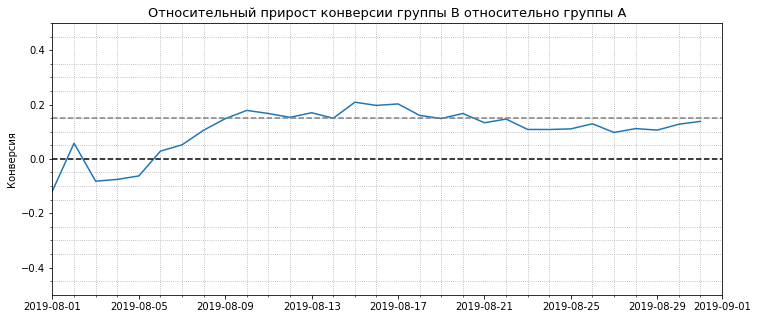

In [43]:
# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel('Конверсия', fontsize = 10)
plt.title('Относительный прирост конверсии группы B относительно группы A', fontsize = 13);

На графике мы можем увидеть, что почти с самого начала теста группа `В` лидирует по конверсии и зафиксировалась около прироста в 15% относительно группы `А`.

### График количества заказов по пользователям

Построим точечный график количества заказов по пользователям. Но для начала найдем число заказов по пользователям, и сохраним в переменной `ordersByUsers`.

In [44]:
ordersByUsers = (orders
                 .groupby('userId', as_index=False)
                 .agg({'orderId': 'nunique'}))

# изменим названия столбцов
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


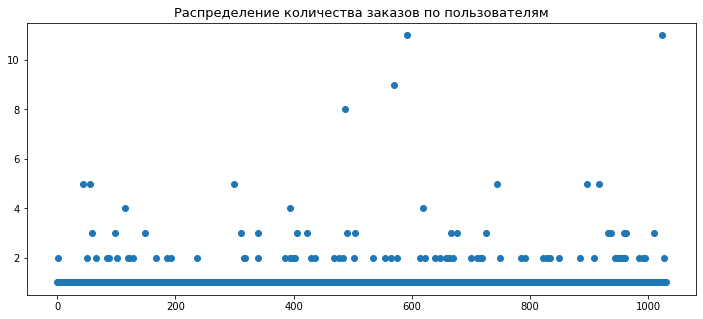

In [45]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# построим точечный график
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Распределение количества заказов по пользователям', fontsize = 13);

Большинство покупателей заказывают только один раз. Пользователей, заказавших более двух раз - мало. Их точная доля не ясна, для этого необходимо посчитать перцентили количества заказов на одного пользователя.

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя с помощью метода percentile().

In [46]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли два и более заказов. И 1% пользователей заказывали четыре и более раз. Выберем количество заказов на одного пользователя равным четырем за верхнюю границу числа заказов.

### Точечный график стоимостей заказов

Построим точечный график стоимостей заказов.

In [47]:
orders.sort_values(by='revenue', ascending=False).head(10)

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


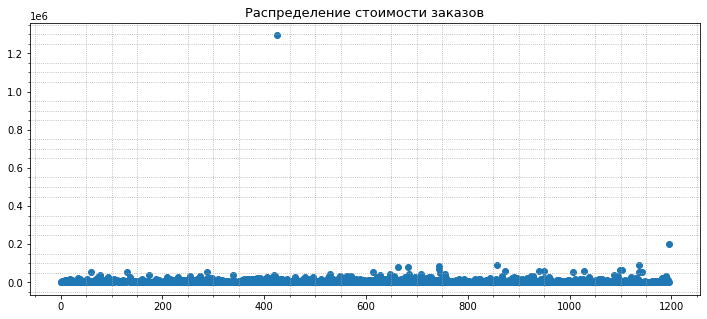

In [48]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders)))

# устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# построим точечный график
plt.scatter(x_values, orders['revenue'])

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.title('Распределение стоимости заказов', fontsize = 13);

Стоимость большинства заказов колеблется до 25 000 - 50 000 рублей. Количество заказов со стоимостью около 100 000 рублей не очень много. Есть выбросы в районе 200 000 рублей и около 1 400 000 рублей. Для более точной доли стоимости заказов, необходимо посчитать перцентили.

### 95-й и 99-й перцентили стоимости заказов

Посчитайте 95-й и 99-й перцентили стоимости заказов.

In [49]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Выберем стоимость заказа равную 58233 рублей за верхнюю границу стоимости заказа. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным - без удаления аномальных пользователей.

Начнём с подготовки данных. Создадим датафрейм `data` со следующими столбцами:
- `date` - дата;
- `ordersPerDateA` - количество заказов в выбранную дату в группе A;
- `revenuePerDateA` - суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` - количество заказов в выбранную дату в группе B;
- `revenuePerDateB` - суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` - суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` - суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` - суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` - суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` - количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` - количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` - количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` - количество пользователей до выбранной даты включительно в группе B.

In [50]:
# узнаем количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# узнаем кумулятивное количество пользователей в выбранную дату в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# узнаем количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# узнаем кумулятивное количество пользователей в выбранную дату в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# узнаем количество заказов и суммарную выручку в выбранную дату в группе A 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# узнаем количество заказов и суммарную выручку в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# узнаем кумулятивное количество заказов и кумулятивную выручку в выбранную дату в группе A 
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# узнаем кумулятивное количество заказов и кумулятивную выручку в выбранную дату в группе B 
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# объединим полученные данные в общую таблицу
data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `userId` и `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

display(ordersByUsersA.head(), ordersByUsersB.head())

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [52]:
sampleA = pd.concat(
    [ordersByUsersA['orders'], 
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders'
              )
    ],
    axis=0)


sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0,
               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders'
              )
    ],
    axis=0) 

Проверим выборки на нормальность с помощью критерия Шапиро-Уилка. 

In [53]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(sampleA)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(sampleB)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки sampleA и sampleB распределены не нормально.

Сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.

```
H_0: Среднее количество заказов на посетителя группы `А` = среднее количество заказов на посетителя группы `В`
H_a: Среднее количество заказов на посетителя группы `А` ≠ среднее количество заказов на посетителя группы `В`
alpha = 0.05
```

In [55]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительное изменение среднего группы B к группе A:', sampleB.mean() / sampleA.mean() - 1)

p-значение: 0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима
Относительное изменение среднего группы B к группе A: 0.13807884655320146


Нулевую гипотезу подтвердить не удалось, а это значит, что разница среднего количества заказов на посетителя между группами по «сырым» данным статистически значима. Относительный прирост среднего группы `B` к конверсии группы `A` равен 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным - без удаления аномальных пользователей.

Сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.

```
H_0: Средний чек группы `А` = средний чек группы `В`
H_a: Средний чек группы `А` ≠ средний чек группы `В`
alpha = 0.05
```

In [56]:
# создадим массивы, содержащие выборки
array_A = orders[orders['group']=='A']['revenue']
array_B = orders[orders['group']=='B']['revenue']

Проверим выборки на нормальность с помощью критерия Шапиро-Уилка.

In [57]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(array_A)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.739723833199812e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [58]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(array_B)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки распределены не нормально.

In [59]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(array_A, array_B)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительное изменение среднего группы B к группе A:', array_B.mean() / array_A.mean() - 1)

p-значение: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное изменение среднего группы B к группе A: 0.2587136699126005


Отвергнуть нулевую гипотезу не получилось, это значит, что средние чеки заказа группы `А` и `B` статистически значимо не различаются. Однако, средний чек группы `B` значительно выше группы `А` на 25,87%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для того, чтобы посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, необходимо сделать срез аномальных пользователей - пользователи с аномальным числом заказов, в нашем случае это пользователи, которые совершили более 4 заказов и пользователи, которые совершили заказ на сумму более 58233 рублей.

In [60]:
# срез пользователей, которые совершили более 4 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)

# срез пользователей, которые совершили заказ на сумму более 58233 рублей
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['userId']

# срез "аномальных" пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# узнаем количество аномальных пользователей 
abnormalUsers.shape[0]

15

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по "очищенным" данным.

In [61]:
sampleAFiltered = pd.concat([
    ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,
              index=np.arange(
                  data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
              name='orders',
             ),
],
    axis=0,
)

sampleBFiltered = pd.concat([
    ordersByUsersB[
        np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,
              index=np.arange(
                  data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
              name='orders',
             ),
],
    axis=0,
) 

Сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.
```
H_0: Среднее количество заказов на посетителя группы `А` = среднее количество заказов на посетителя группы `В`
H_a: Среднее количество заказов на посетителя группы `А` ≠ среднее количество заказов на посетителя группы `В`
alpha = 0.05
```

In [62]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительное изменение среднего группы B к группе A:', sampleBFiltered.mean() / sampleAFiltered.mean() - 1)

p-значение: 0.014380135585307981
Отвергаем нулевую гипотезу: разница статистически значима
Относительное изменение среднего группы B к группе A: 0.15331306791514754


Результаты по среднему количеству заказов на пользователя практически не изменились - разница среднего количества заказов на посетителя между группами по «очищенным» данным статистически значима. Относительный прирост среднего группы `B` к конверсии группы `A` равен 15,33%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Узнаем статистическую значимость различий в среднем чеке заказа между группами теста по "очищенным" данным.

Сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.

```
H_0: Средний чек группы `А` = средний чек группы `В`
H_a: Средний чек группы `А` ≠ средний чек группы `В`
alpha = 0.05
```

In [63]:
# создадим массивы, содержащие выборки
array_AFiltered = orders[np.logical_and(orders['group'] == 'A',
                                        np.logical_not(orders['userId'].isin(abnormalUsers)),
                                       )
                        ]['revenue']

array_BFiltered = orders[np.logical_and(orders['group'] == 'B',
                                        np.logical_not(orders['userId'].isin(abnormalUsers)),
                                       )
                        ]['revenue']

# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(array_AFiltered, array_BFiltered, alternative="two-sided")

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительное изменение среднего группы B к группе A:', array_BFiltered.mean() / array_AFiltered.mean() - 1)

p-значение: 0.8509126191381939
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное изменение среднего группы B к группе A: -0.005748871952734214


Результаты по среднему чеку не изменились - средние чеки заказа группы А и B после фильтрации статистически значимо не различаются. Но, стоит отметить, что разница между группами сократилась с 25,87% до -0,57%.

### Решение по результатам теста

Решение по результатам теста: остановить тест, зафиксировать победу группы `B`, так как:

1) Разница среднего количества заказов на посетителя между группами по «сырым» и «очищенным» данным статистически значима. Относительный прирост среднего группы B к конверсии группы A по «сырым» и «очищенным» данным - 13,8% и 16,04% соответственно.

2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным - после фильтрации аномалий;

3) График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к его ухудшению:

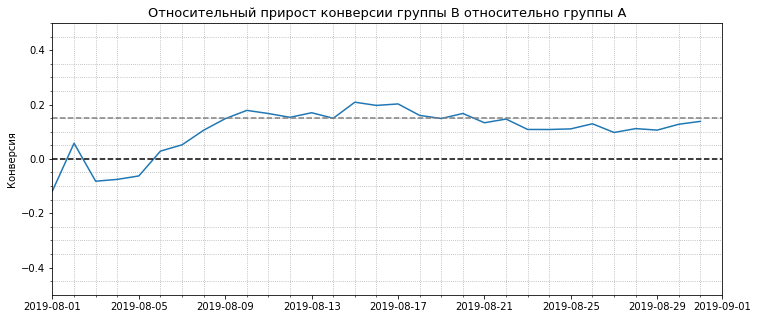

4) График различия среднего чека говорит о том, что результаты группы B лучше группы A, несмотря на то, что показатели группы B имеют тенденцию к падению, или зафиксировались около среднего значения:

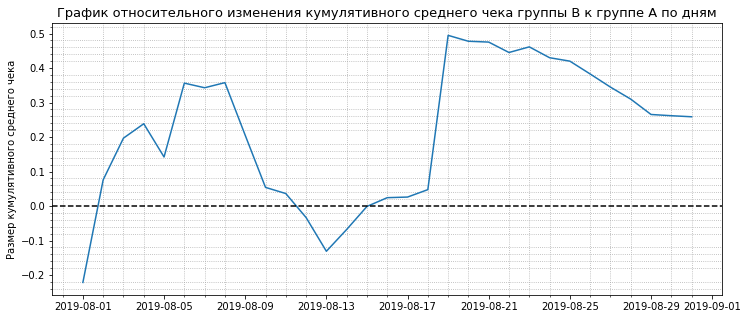



## Общий вывод

**Провели приоретизацию гипотез:**

*1. Самая перспективная гипотеза по методу ICE:*
- `Гипотеза_8` - запустить акцию, дающую скидку на товар в день рождения.

*2. Самая перспективная гипотеза по методу RICE:*
- `Гипотеза_7` - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Провели анализ A/B-теста и установили, что:**
1. Среднее количество заказов на посетителя группы `А` и `B` по «сырым» данным и после фильтрации статистически значимо различаются.
2. Средний чек группы `А` и `B` по «сырым» данным и после фильтрации статистически значимо не различаются.
3. Среднее количество заказов группы `B` выше группы `А`.
4. Средний чек группы `B` выше группы `А`.

**Рекомендуем остановить тест и зафиксировать победу группы `B`.**